Saved: shares/A_Share_1.png
Saved: shares/A_Share_2.png
Saved: shares/A_Share_3.png
Saved: shares/A_Share_4.png
Saved: shares/B_Share_1.png
Saved: shares/B_Share_2.png
Saved: shares/B_Share_3.png
Saved: shares/B_Share_4.png


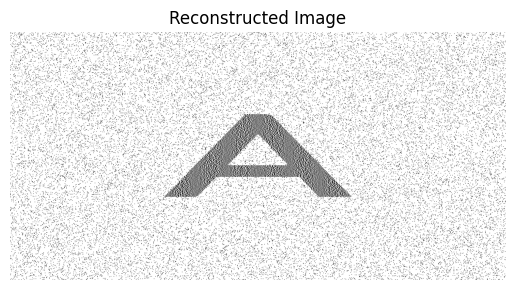

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from itertools import combinations
import random
import os

def binary_image_from_path(image_path, threshold=128):
    """Convert an image to a binary image."""
    image = Image.open(image_path).convert("L")  # Convert to grayscale
    binary_image = np.array(image) > threshold  # Convert to binary
    return binary_image.astype(int)

def generate_subsets(k):
    """Generate all subsets of even and odd cardinality."""
    elements = list(range(k))
    even_subsets = [set(comb) for r in range(0, k + 1, 2) for comb in combinations(elements, r)]
    odd_subsets = [set(comb) for r in range(1, k + 1, 2) for comb in combinations(elements, r)]
    return even_subsets, odd_subsets

def construct_matrices(k):
    """Construct C0 and C1 matrices based on even and odd subsets."""
    even_subsets, odd_subsets = generate_subsets(k)
    num_columns = len(even_subsets)
    C0 = np.zeros((k, num_columns), dtype=int)
    C1 = np.zeros((k, num_columns), dtype=int)
    for i in range(k):
        for j, subset in enumerate(even_subsets):
            if i in subset:
                C0[i, j] = 1
        for j, subset in enumerate(odd_subsets):
            if i in subset:
                C1[i, j] = 1
    return C0, C1

def generate_random_functions(n, k):
    """Generate a collection of random functions mapping {1..n} -> {1..k}."""
    return [lambda x, k=k: random.randint(0, k - 1) for _ in range(n * k)]

def save_share(share, filename):
    """Save a share as an image, converting it to uint8 format."""
    share = (share * 255).astype(np.uint8)  # Convert binary to grayscale and ensure uint8 format
    img = Image.fromarray(share)  
    img.save(filename)


def construct_shares_k_out_n(image, k, n, image_label):
    """Generate and save shares."""
    height, width = image.shape
    C0, C1 = construct_matrices(k)
    num_subpixels = C0.shape[1]
    shares = np.zeros((n, height, width * num_subpixels), dtype=int)
    H = generate_random_functions(n, k)

    for i in range(height):
        for j in range(width):
            pixel = image[i, j]
            subpixel_pattern = C0 if pixel == 0 else C1
            permuted_pattern = subpixel_pattern[:, np.random.permutation(num_subpixels)]
            for participant in range(n):
                h = H[random.randint(0, len(H) - 1)]
                row_index = h(participant)
                shares[participant, i, j * num_subpixels: (j + 1) * num_subpixels] = permuted_pattern[row_index]

    os.makedirs("shares", exist_ok=True)
    for i in range(n):
        filename = f"shares/{image_label}_Share_{i + 1}.png"
        save_share(shares[i], filename)
        print(f"Saved: {filename}")

    return shares

def reconstruct_image(selected_shares):
    """Reconstruct the image from selected shares."""
    height, full_width = selected_shares[0].shape
    num_subpixels = full_width // selected_shares[0].shape[1]
    width = full_width // num_subpixels
    reconstructed = np.zeros((height, width), dtype=int)

    for i in range(height):
        for j in range(width):
            subpixel_sum = np.zeros(num_subpixels, dtype=int)
            for share in selected_shares:
                subpixel_sum |= share[i, j * num_subpixels: (j + 1) * num_subpixels]
            reconstructed[i, j] = 1 if np.sum(subpixel_sum) == num_subpixels else 0

    return reconstructed

def display_image(image, title):
    """Display an image."""
    plt.imshow(image, cmap="gray")
    plt.title(title)
    plt.axis("off")
    plt.show()

# ======================== EXAMPLE USAGE ========================

k = 2  # Minimum required shares for reconstruction
n = 4  # Total number of shares

# Image file paths
image_paths = {
    "A": "/home/arvind/VC/Alphabets/A.jpeg",
    "B": "/home/arvind/VC/Alphabets/B.jpeg"
}

all_shares = {}

# Generate and save shares for each image
for label, path in image_paths.items():
    binary_image = binary_image_from_path(path)
    all_shares[label] = construct_shares_k_out_n(binary_image, k, n, label)

# =========== USER SELECTS SHARES FOR RECONSTRUCTION ===========
# Example: User selects share 1 from A and share 2 from B
selected_shares = [all_shares["A"][0],all_shares["A"][1],all_shares["A"][2],all_shares["A"][3]]

# Reconstruct the image
reconstructed_image = reconstruct_image(selected_shares)

# Display the reconstructed image
display_image(reconstructed_image, "Reconstructed Image")


In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from PIL import Image
# from itertools import combinations
# import random
# import os
# from tkinter import Tk
# from tkinter.filedialog import askopenfilename

# def binary_image_from_path(image_path, threshold=128):
#     """Convert an image to a binary image."""
#     image = Image.open(image_path).convert("L")  # Convert to grayscale
#     binary_image = np.array(image) > threshold  # Convert to binary
#     return binary_image.astype(int)

# def generate_subsets(k):
#     """Generate all subsets of even and odd cardinality."""
#     elements = list(range(k))
#     even_subsets = [set(comb) for r in range(0, k + 1, 2) for comb in combinations(elements, r)]
#     odd_subsets = [set(comb) for r in range(1, k + 1, 2) for comb in combinations(elements, r)]
#     return even_subsets, odd_subsets

# def construct_matrices(k):
#     """Construct C0 and C1 matrices based on even and odd subsets."""
#     even_subsets, odd_subsets = generate_subsets(k)
#     num_columns = len(even_subsets)
#     C0 = np.zeros((k, num_columns), dtype=int)
#     C1 = np.zeros((k, num_columns), dtype=int)
#     for i in range(k):
#         for j, subset in enumerate(even_subsets):
#             if i in subset:
#                 C0[i, j] = 1
#         for j, subset in enumerate(odd_subsets):
#             if i in subset:
#                 C1[i, j] = 1
#     return C0, C1

# def generate_random_functions(n, k):
#     """Generate a collection of random functions mapping {1..n} -> {1..k}."""
#     return [lambda x, k=k: random.randint(0, k - 1) for _ in range(n * k)]

# def save_share(share, filename):
#     """Save a share as an image, converting it to uint8 format."""
#     share = (share * 255).astype(np.uint8)  # Convert binary to grayscale and ensure uint8 format
#     img = Image.fromarray(share)  
#     img.save(filename)

# def construct_shares_k_out_n(image, k, n, image_label):
#     """Generate and save shares."""
#     height, width = image.shape
#     C0, C1 = construct_matrices(k)
#     num_subpixels = C0.shape[1]
#     shares = np.zeros((n, height, width * num_subpixels), dtype=int)
#     H = generate_random_functions(n, k)

#     for i in range(height):
#         for j in range(width):
#             pixel = image[i, j]
#             subpixel_pattern = C0 if pixel == 0 else C1
#             permuted_pattern = subpixel_pattern[:, np.random.permutation(num_subpixels)]
#             for participant in range(n):
#                 h = H[random.randint(0, len(H) - 1)]
#                 row_index = h(participant)
#                 shares[participant, i, j * num_subpixels: (j + 1) * num_subpixels] = permuted_pattern[row_index]

#     os.makedirs("shares", exist_ok=True)
#     for i in range(n):
#         filename = f"shares/{image_label}_Share_{i + 1}.png"
#         save_share(shares[i], filename)
#         print(f"Saved: {filename}")

#     return shares

# def reconstruct_image(selected_shares):
#     """Reconstruct the image from selected shares."""
#     height, full_width = selected_shares[0].shape
#     num_subpixels = full_width // selected_shares[0].shape[1]
#     width = full_width // num_subpixels
#     reconstructed = np.zeros((height, width), dtype=int)

#     for i in range(height):
#         for j in range(width):
#             subpixel_sum = np.zeros(num_subpixels, dtype=int)
#             for share in selected_shares:
#                 subpixel_sum |= share[i, j * num_subpixels: (j + 1) * num_subpixels]
#             reconstructed[i, j] = 1 if np.sum(subpixel_sum) == num_subpixels else 0

#     return reconstructed

# def display_image(image, title):
#     """Display an image."""
#     plt.imshow(image, cmap="gray")
#     plt.title(title)
#     plt.axis("off")
#     plt.show()

# def main():
#     # Hide the root Tkinter window
#     Tk().withdraw()
    
#     # Open a file dialog to select an image
#     image_path = askopenfilename(title="Select an image file", filetypes=[("Image files", "*.jpg;*.jpeg;*.png;*.bmp;*.gif")])
    
#     if not image_path:
#         print("No image selected. Exiting...")
#         return
    
#     # Extract the image label from the file name
#     image_label = os.path.splitext(os.path.basename(image_path))[0]
    
#     k = 2  # Minimum required shares for reconstruction
#     n = 4  # Total number of shares

#     # Generate and save shares for the selected image
#     binary_image = binary_image_from_path(image_path)
#     all_shares = construct_shares_k_out_n(binary_image, k, n, image_label)

#     # Example: User selects share 1 from the generated shares
#     selected_shares = [all_shares[0]]

#     # Reconstruct the image
#     reconstructed_image = reconstruct_image(selected_shares)

#     # Display the reconstructed image
#     display_image(reconstructed_image, "Reconstructed Image")

# if __name__ == "__main__":
#     main()


import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from itertools import combinations
import random
import os
from tkinter import Tk
from tkinter.filedialog import askopenfilename

def binary_image_from_path(image_path, threshold=128):
    """Convert an image to a binary image."""
    image = Image.open(image_path).convert("L")  # Convert to grayscale
    binary_image = np.array(image) > threshold  # Convert to binary
    return binary_image.astype(int)

def generate_subsets(k):
    """Generate all subsets of even and odd cardinality."""
    elements = list(range(k))
    even_subsets = [set(comb) for r in range(0, k + 1, 2) for comb in combinations(elements, r)]
    odd_subsets = [set(comb) for r in range(1, k + 1, 2) for comb in combinations(elements, r)]
    return even_subsets, odd_subsets

def construct_matrices(k):
    """Construct C0 and C1 matrices based on even and odd subsets."""
    even_subsets, odd_subsets = generate_subsets(k)
    num_columns = len(even_subsets)
    C0 = np.zeros((k, num_columns), dtype=int)
    C1 = np.zeros((k, num_columns), dtype=int)
    for i in range(k):
        for j, subset in enumerate(even_subsets):
            if i in subset:
                C0[i, j] = 1
        for j, subset in enumerate(odd_subsets):
            if i in subset:
                C1[i, j] = 1
    return C0, C1

def generate_random_functions(n, k):
    """Generate a collection of random functions mapping {1..n} -> {1..k}."""
    return [lambda x, k=k: random.randint(0, k - 1) for _ in range(n * k)]

def save_share(share, filename):
    """Save a share as an image, converting it to uint8 format."""
    share = (share * 255).astype(np.uint8)  # Convert binary to grayscale and ensure uint8 format
    img = Image.fromarray(share)  
    img.save(filename)

def construct_shares_k_out_n(image, k, n, image_label):
    """Generate and save shares."""
    height, width = image.shape
    C0, C1 = construct_matrices(k)
    num_subpixels = C0.shape[1]
    shares = np.zeros((n, height, width * num_subpixels), dtype=int)
    H = generate_random_functions(n, k)

    for i in range(height):
        for j in range(width):
            pixel = image[i, j]
            subpixel_pattern = C0 if pixel == 0 else C1
            permuted_pattern = subpixel_pattern[:, np.random.permutation(num_subpixels)]
            for participant in range(n):
                h = H[random.randint(0, len(H) - 1)]
                row_index = h(participant)
                shares[participant, i, j * num_subpixels: (j + 1) * num_subpixels] = permuted_pattern[row_index]

    os.makedirs("shares", exist_ok=True)
    for i in range(n):
        filename = f"shares/{image_label}_Share_{i + 1}.png"
        save_share(shares[i], filename)
        print(f"Saved: {filename}")

    return shares

def reconstruct_image(selected_shares):
    """Reconstruct the image from selected shares."""
    height, full_width = selected_shares[0].shape
    num_subpixels = full_width // selected_shares[0].shape[1]
    width = full_width // num_subpixels
    reconstructed = np.zeros((height, width), dtype=int)

    for i in range(height):
        for j in range(width):
            subpixel_sum = np.zeros(num_subpixels, dtype=int)
            for share in selected_shares:
                subpixel_sum |= share[i, j * num_subpixels: (j + 1) * num_subpixels]
            reconstructed[i, j] = 1 if np.sum(subpixel_sum) == num_subpixels else 0

    return reconstructed

def display_image(image, title):
    """Display an image."""
    plt.imshow(image, cmap="gray")
    plt.title(title)
    plt.axis("off")
    plt.show()

def main():
    # Hide the root Tkinter window
    Tk().withdraw()
    
    # Open a file dialog to select an image
    image_path = askopenfilename(title="Select an image file", filetypes=[("Image files", "*.png"), ("Image files", "*.jpeg")])
    
    if not image_path:
        print("No image selected. Exiting...")
        return
    
    # Extract the image label from the file name
    image_label = os.path.splitext(os.path.basename(image_path))[0]
    
    k = 2  # Minimum required shares for reconstruction
    n = 4  # Total number of shares

    # Generate and save shares for the selected image
    binary_image = binary_image_from_path(image_path)
    all_shares = construct_shares_k_out_n(binary_image, k, n, image_label)

    # Example: User selects share 1 from the generated shares
    selected_shares = [all_shares[0]]

    # Reconstruct the image
    reconstructed_image = reconstruct_image(selected_shares)

    # Display the reconstructed image
    display_image(reconstructed_image, "Reconstructed Image")

if __name__ == "__main__":
    main()
